# 3-5. 등고선 (Contour)

## 3-5-1 기본 등고선 그림

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a=5
b=2
xcenter=2
ycenter=1

x=np.arange(-10, 10+0.5, 0.5)
y=np.arange(-5, 5+0.1, 0.1)

x2d, y2d = np.meshgrid(x,y)
z=np.exp(-((x2d/a)**2 + (y2d/b)**2))

In [2]:
print(x2d)
print(y2d)
print(x2d.shape)
print(y2d.shape)
z

[[-10.   -9.5  -9.  ...   9.    9.5  10. ]
 [-10.   -9.5  -9.  ...   9.    9.5  10. ]
 [-10.   -9.5  -9.  ...   9.    9.5  10. ]
 ...
 [-10.   -9.5  -9.  ...   9.    9.5  10. ]
 [-10.   -9.5  -9.  ...   9.    9.5  10. ]
 [-10.   -9.5  -9.  ...   9.    9.5  10. ]]
[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]
 [ 5.   5.   5.  ...  5.   5.   5. ]]
(101, 41)
(101, 41)


array([[3.53575009e-05, 5.22223497e-05, 7.56041033e-05, ...,
        7.56041033e-05, 5.22223497e-05, 3.53575009e-05],
       [4.52865717e-05, 6.68873966e-05, 9.68351994e-05, ...,
        9.68351994e-05, 6.68873966e-05, 4.52865717e-05],
       [5.77146221e-05, 8.52433884e-05, 1.23409804e-04, ...,
        1.23409804e-04, 8.52433884e-05, 5.77146221e-05],
       ...,
       [5.77146221e-05, 8.52433884e-05, 1.23409804e-04, ...,
        1.23409804e-04, 8.52433884e-05, 5.77146221e-05],
       [4.52865717e-05, 6.68873966e-05, 9.68351994e-05, ...,
        9.68351994e-05, 6.68873966e-05, 4.52865717e-05],
       [3.53575009e-05, 5.22223497e-05, 7.56041033e-05, ...,
        7.56041033e-05, 5.22223497e-05, 3.53575009e-05]])

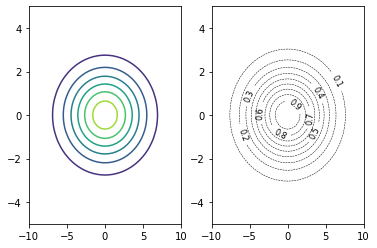

In [3]:
fig = plt.figure()
fig.add_subplot(121)
plt.contour(x2d,y2d, z)

fig.add_subplot(122)
contour_levels = np.arange(0, 1+0.1, 0.1)
contour = plt.contour(x2d, y2d, z, levels=contour_levels, colors='k', linewidths = 0.5, linestyles ='--')
plt.clabel(contour, inline = True, fontsize=8, fmt = '%.1f')

plt.show()

In [4]:
# 3-5-2. 등고선 색 채우기 (Shading)

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib import cm
from matplotlib.colors import ListedColormap
import xarray as xr

In [5]:
minlat=30
maxlat=90
minp = 300
maxp = 1000

In [6]:
f = Dataset("air.mon.ltm1.nc", "r")
level = np.squeeze(f.variables["level"][:])
lat = np.squeeze(f.variables["lat"][:])
print("lat.shape before :", lat.shape)

index_lat = np.logical_and(lat>=minlat, lat<=maxlat)
index_level = np.logical_and(level>=minp, level<=maxp)
lat=lat[index_lat]
print("lat.shape after :", lat.shape)
level=level[index_level]

airclim = f.variables["air"]
print(airclim.shape) #(12, 17, 73, 144)
airclim = np.squeeze(f.variables["air"][9:10+1, index_level, index_lat, :])
print(airclim.shape) #(2, 8, 25, 144)
airclim = np.mean(airclim, axis = (0,3)) #경도에 대해서 10-11월 평균 즉 경도 dimension 사라짐.
print(airclim.shape) #(8, 25) #level과 latitude 만 남음.

lat.shape before : (73,)
lat.shape after : (25,)
(12, 17, 73, 144)
(2, 8, 25, 144)
(8, 25)


In [7]:
#path = './air.mon.mean1.nc'
#ncfile = xr.open_dataset(path)
#print(ncfile)

In [8]:
f=Dataset("air.mon.mean1.nc","r")
time = np.squeeze(f.variables["time"][:])

time = np.array([date(1800,1,1) + timedelta(hours=x) for x in time])
#연/월/일 형식으로 time 변수 값 바꿔서 저장하기
years = np.array([x.year for x in time])
months = np.array([x.month for x in time])
#print("years.shape : ", years.shape)
#print(years)

index_time= np.logical_and.reduce((years >= 2017, years<=2022, months>=10, months<=11))
print(index_time.shape) #[Boolean 형태의 array] #(849,)

# logical_and.recue() 사용 이유
#years array에서 2017~2022
# months array에서 10월~ 11월
#동시에 만족하는 (둘다(and) True 값을 가지는 2017~2022년 10월 11월에 해당하는 애들만 True 값 반환)
#애들을 하나의 array로 합쳐서 반환


'''
index_time2= np.logical_and(years >= 2017, years<=2022)
print("w/o reduce :", index_time2.shape, index_time2.sum())
years2 = years[index_time2]
print("years after1 : ")
print(years2)

index_time3= np.logical_and(months>=10, months<=11)
months2 = months[index_time3]
print("months after1 :")
print(months2)

#index_time4= np.logical_and.reduce(index_time2, index_time3)
##print("w/o reduce :",index_time2.shape, index_time2.sum())
'''

(894,)


'\nindex_time2= np.logical_and(years >= 2017, years<=2022)\nprint("w/o reduce :", index_time2.shape, index_time2.sum())\nyears2 = years[index_time2]\nprint("years after1 : ")\nprint(years2)\n\nindex_time3= np.logical_and(months>=10, months<=11)\nmonths2 = months[index_time3]\nprint("months after1 :")\nprint(months2)\n\n#index_time4= np.logical_and.reduce(index_time2, index_time3)\n##print("w/o reduce :",index_time2.shape, index_time2.sum())\n'

In [9]:
air = f.variables["air"]
print(air.shape) #(894, 17, 73, 144)
air=np.squeeze(f.variables["air"][index_time, index_level, index_lat, :])
print(air.shape) #(12, 8, 25, 144) #2007-2012년 6년간의 10월 11월 이니까 time dimesion은 총 12개
air = np.mean(air, axis=(0,3))
print(air.shape) #(8, 25)

air_anom = air - airclim

(894, 17, 73, 144)
(10, 8, 25, 144)
(8, 25)


In [18]:
cmap1 = cm.get_cmap("gist_rainbow", 100)
#print("전:", cmap1)
cmap1 = cmap1(np.arange(100)) #배열/행렬 형태로 만들기 
#print("후:",cmap1)

print(cmap1.shape) #(100,4)
print("cmap1[0] :", cmap1[0], "cmap[-11] : ", cmap1[-11])
cmap1 = cmap1[::-1][10:] #배열순서 뒤집고 [10:] 슬라이싱
print(cmap1.shape) #(90,4)
print("cmap[0] :", cmap1[0], "cmap[-1] : ", cmap1[-1])

bluegreen = cmap1[15:40]
yellowred = cmap1[55:90]

cmap2 = cm.get_cmap("magma", 100)
cmap2 = cmap2(np.arange(100))
magenta = cmap2[20:40]

cmap_stack = np.vstack((magenta, bluegreen, yellowred))
new_cmap = ListedColormap(cmap_stack, name = "new_rainbow")

(100, 4)
cmap1[0] : [1.   0.   0.16 1.  ] cmap[-11] :  [0.70103206 0.         1.         1.        ]
(90, 4)
cmap[0] : [0.70103206 0.         1.         1.        ] cmap[-1] :  [1.   0.   0.16 1.  ]


['-5.5' '-5.0' '-4.5' '-4.0' '-3.5' '-3.0' '-2.5' '-2.0' '-1.5' '-1.0'
 '-0.5' '0.0' '0.5' '1.0' '1.5' '2.0' '2.5' '3.0']


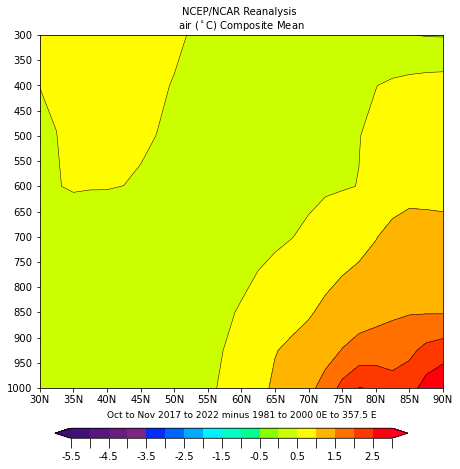

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

contour_levels = np.arange(-5.5, 3+0.5, 0.5)
image = ax.contourf(lat, level, air_anom, contour_levels, cmap=new_cmap, extend = 'both')
ax.contour(lat, level, air_anom, contour_levels, colors = 'k', linewidths = 0.5)

ax.invert_yaxis()
lat_ticks = np.arange(30,90+5,5)
level_ticks = np.arange(300,1000+50, 50)
ax.set_xticks(lat_ticks)
ax.set_yticks(level_ticks)
ax.set_xticklabels([str(x) + 'N' for x in lat_ticks])
ax.set_yticklabels([str(y) for y in level_ticks])

ax.set_title("NCEP/NCAR Reanalysis \nair ($^\circ$C) Composite Mean", fontsize=10)
ax.text(minlat+10, maxp+60, "Oct to Nov 2017 to 2022 minus 1981 to 2000 0E to 357.5 E", fontsize=9)

caxes = fig.add_axes([0.13, 0.1, 0.7, 0.02])
#fig.add_axes([x축 시작위치, y축 시작위치, 이미지 가로길이, 이미지 높이])

cbar = plt.colorbar(image,cax = caxes, orientation = 'horizontal', ticks = contour_levels )
#cbar = plt.colorbar(image, orientation = 'horizontal', ticks = contour_levels )
cbar.ax.tick_params(direction="out", length=10)
#direction = in, out, inout

cbar_levels = np.array([str(x) for x in contour_levels])
print(cbar_levels) #['-5.5' '-5.0' ... '2.5' '3.0']
cbar_levels[1::2]="" #"1,3,5, ...번째 눈금은 표시하지 않음"
cbar.ax.set_xticklabels(cbar_levels)

plt.subplots_adjust(top=0.9, bottom = 0.2, left=0.1, right=0.9, wspace=0.1, hspace=0.1)

filename_figure = "T_anomaly_vertical_across_section.png"
plt.savefig(filename_figure)

### NOTE 색칠된 격자 형태의 그림을 그리는 방법

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dx=10
dy=10

x=np.arange(0,360+dx, dx)
y=np.arange(0, 90+dy, dy)
x2d, y2d = np.meshgrid(x,y)
deg2rad = np.pi/180

phi0=1e8 #위도 0  경도 0에서의 streamfunction
U=20 #서풍 (지균풍 가정)
A=6e7 #stream function 진폭
R=6.37e6 #지구 반지름
phi=phi0- U*R*y2d*deg2rad + A*np.sin(x2d*2*np.pi/120)*np.cos((y2d-45)*2*np.pi/180)
#기후역학 Ch05 82p 의 geopotential wave 공식
#Φ(x,y) = Φ0(x,y) − f*u(p)*y + f*A*sin(kx)*cos(ly)
#streamfunction (지균풍을 일으키는 배경장 + 경도방향 파수 3, 위도방향 파수 2인 파도)
vmin = np.min(phi);print(vmin)
vmax = np.max(phi);print(vmax)

print(phi.shape) #(10, 37)
print(phi[1])
phi = phi[:-1,:-1]
print(phi.shape) #(9,36)

-100119452.03366983
100000000.0
(10, 37)
[77764505.32959224 88025109.6293623  95536393.29315367 98285713.92913237
 95536393.29315367 88025109.6293623  77764505.32959226 67503901.02982219
 59992617.36603081 57243296.73005211 59992617.36603081 67503901.02982219
 77764505.32959221 88025109.62936229 95536393.29315367 98285713.92913237
 95536393.29315369 88025109.6293623  77764505.32959226 67503901.02982217
 59992617.3660308  57243296.73005211 59992617.36603081 67503901.02982219
 77764505.3295922  88025109.62936229 95536393.29315366 98285713.92913237
 95536393.29315369 88025109.62936234 77764505.32959226 67503901.0298222
 59992617.36603083 57243296.73005211 59992617.36603081 67503901.02982211
 77764505.32959223]
(9, 36)


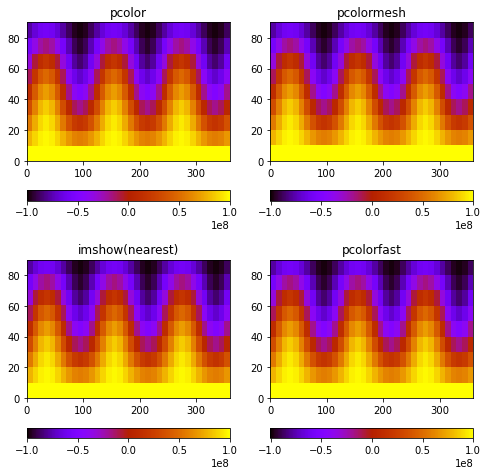

In [25]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

#plt.pcolor()
image = ax[0][0].pcolor(x2d, y2d, phi, cmap = 'gnuplot', vmin=vmin, vmax=vmax)
ax[0][0].set_title("pcolor")
plt.colorbar(image, ax = ax[0][0], orientation = 'horizontal')

#plt.pcolormesh()
image = ax[0][1].pcolormesh(x2d, y2d, phi, cmap = 'gnuplot', vmin=vmin, vmax=vmax)
ax[0][1].set_title("pcolormesh")
plt.colorbar(image, ax=ax[0][1], orientation = 'horizontal')

#plt.imshow()
image = ax[1][0].imshow(phi, cmap = 'gnuplot', vmin = vmin, vmax=vmax,
                       extent = [0,360,0,90], interpolation = 'nearest', aspect = 'auto', origin='lower')
ax[1][0].set_title("imshow(nearest)") #최근접 보간법
plt.colorbar(image, ax=ax[1][0], orientation='horizontal')

#axes.pcolorfast()

image = ax[1][1].pcolorfast(x2d, y2d, phi, cmap='gnuplot', vmin=vmin, vmax=vmax)
ax[1][1].set_title("pcolorfast")
plt.colorbar(image, ax=ax[1][1], orientation='horizontal')

plt.show()